In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('dataset2.csv')
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [4]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [5]:
correlation_matrix = df.corr()
print(correlation_matrix)

                      ID    Gender   Own_car  Own_property  Work_phone  \
ID              1.000000  0.014427 -0.003829     -0.071906    0.067723   
Gender          0.014427  1.000000  0.355420     -0.056067    0.059095   
Own_car        -0.003829  0.355420  1.000000     -0.010190    0.029406   
Own_property   -0.071906 -0.056067 -0.010190      1.000000   -0.184285   
Work_phone      0.067723  0.059095  0.029406     -0.184285    1.000000   
Phone           0.005400 -0.019123  0.004253     -0.052136    0.288331   
Email          -0.025062  0.006548  0.022261      0.056014   -0.040473   
Unemployed     -0.029437 -0.168753 -0.145493      0.086675   -0.242499   
Num_children    0.021149  0.054211  0.089565     -0.000480    0.052890   
Num_family      0.015102  0.078460  0.138548      0.008782    0.062499   
Account_length -0.005465 -0.008431  0.025058     -0.009627    0.015013   
Total_income   -0.003212  0.200750  0.221874      0.025562   -0.030854   
Age            -0.040211 -0.173157 -0.

<function matplotlib.pyplot.show(close=None, block=None)>

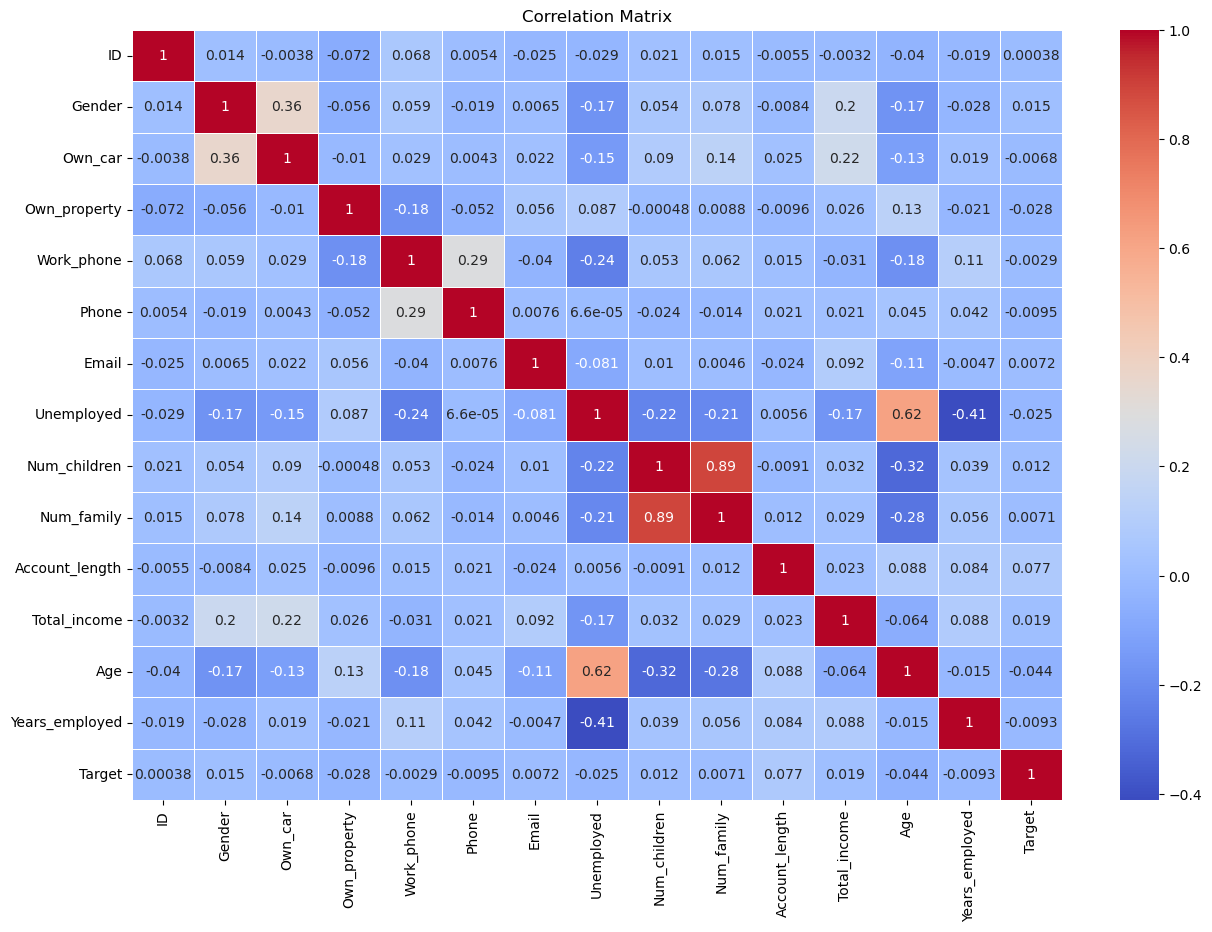

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show

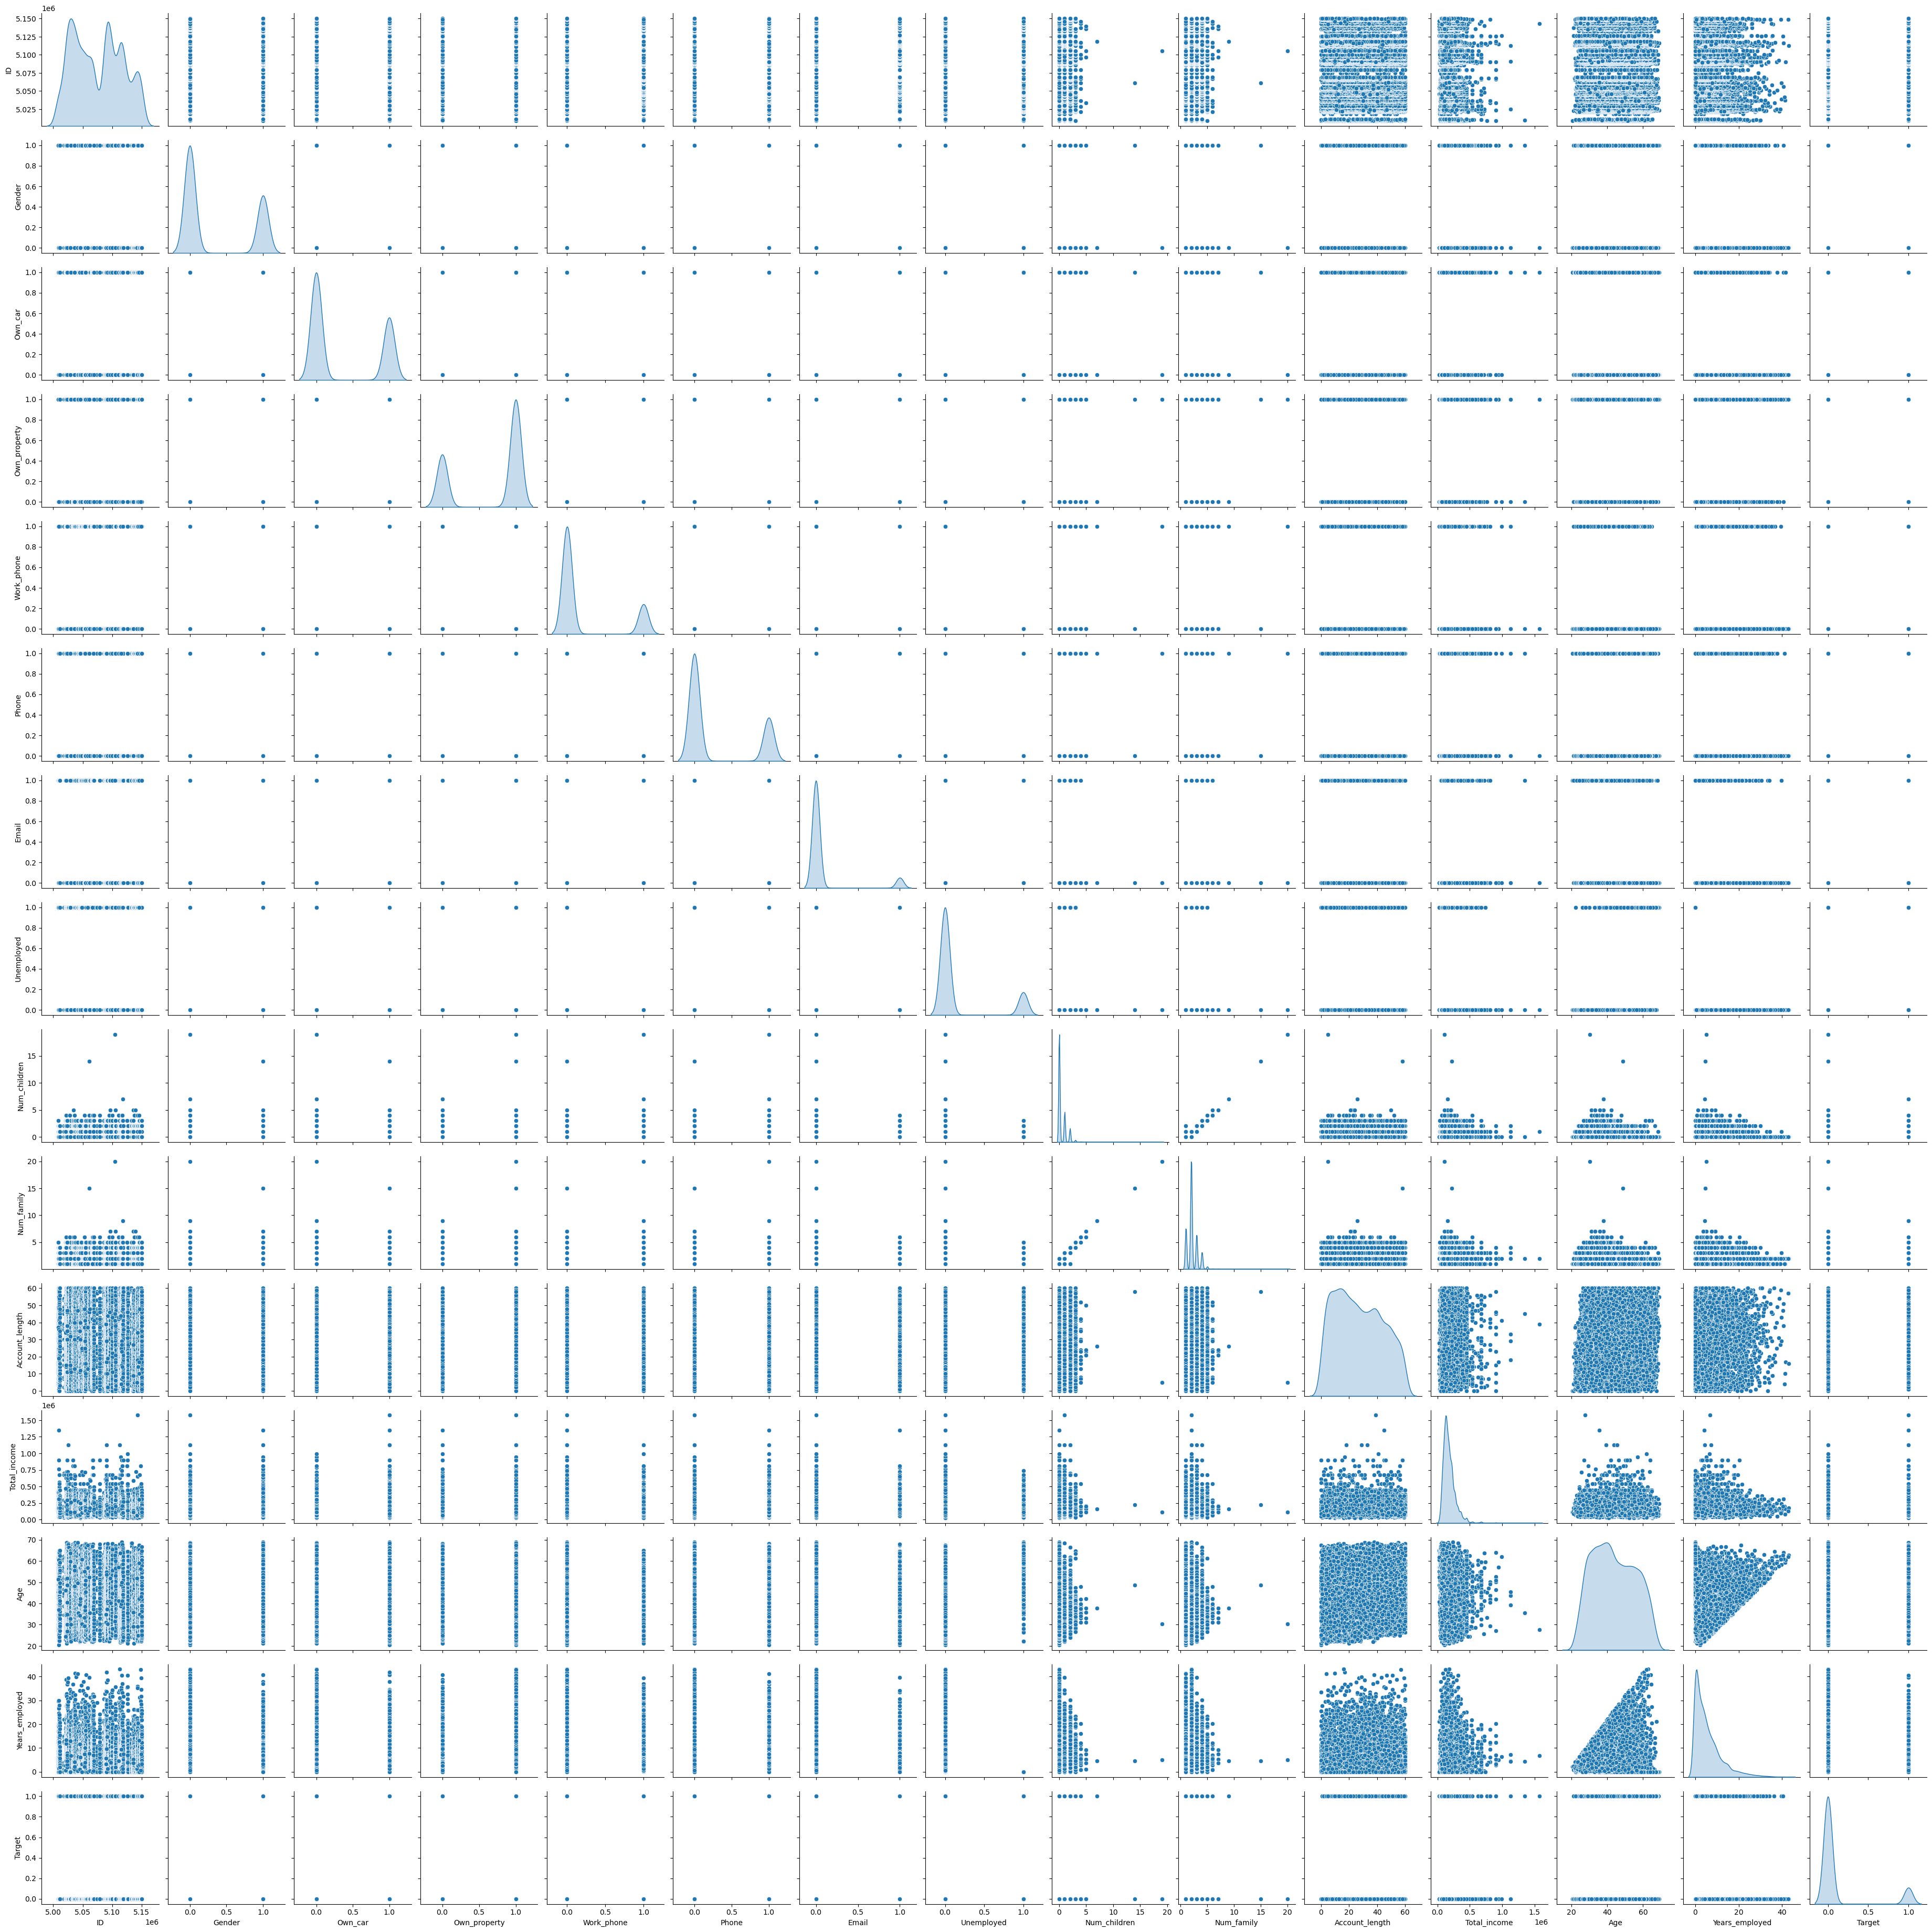

In [7]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [8]:
# Display summary statistics
summary_statistics = df.describe(include='all')
print("Summary Statistics:\n", summary_statistics)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)



Summary Statistics:
                   ID       Gender      Own_car  Own_property   Work_phone  \
count   9.709000e+03  9709.000000  9709.000000   9709.000000  9709.000000   
unique           NaN          NaN          NaN           NaN          NaN   
top              NaN          NaN          NaN           NaN          NaN   
freq             NaN          NaN          NaN           NaN          NaN   
mean    5.076105e+06     0.348749     0.367700      0.671542     0.217427   
std     4.080270e+04     0.476599     0.482204      0.469677     0.412517   
min     5.008804e+06     0.000000     0.000000      0.000000     0.000000   
25%     5.036955e+06     0.000000     0.000000      0.000000     0.000000   
50%     5.069449e+06     0.000000     0.000000      1.000000     0.000000   
75%     5.112986e+06     1.000000     1.000000      1.000000     0.000000   
max     5.150479e+06     1.000000     1.000000      1.000000     1.000000   

              Phone        Email   Unemployed  Num_chi

/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

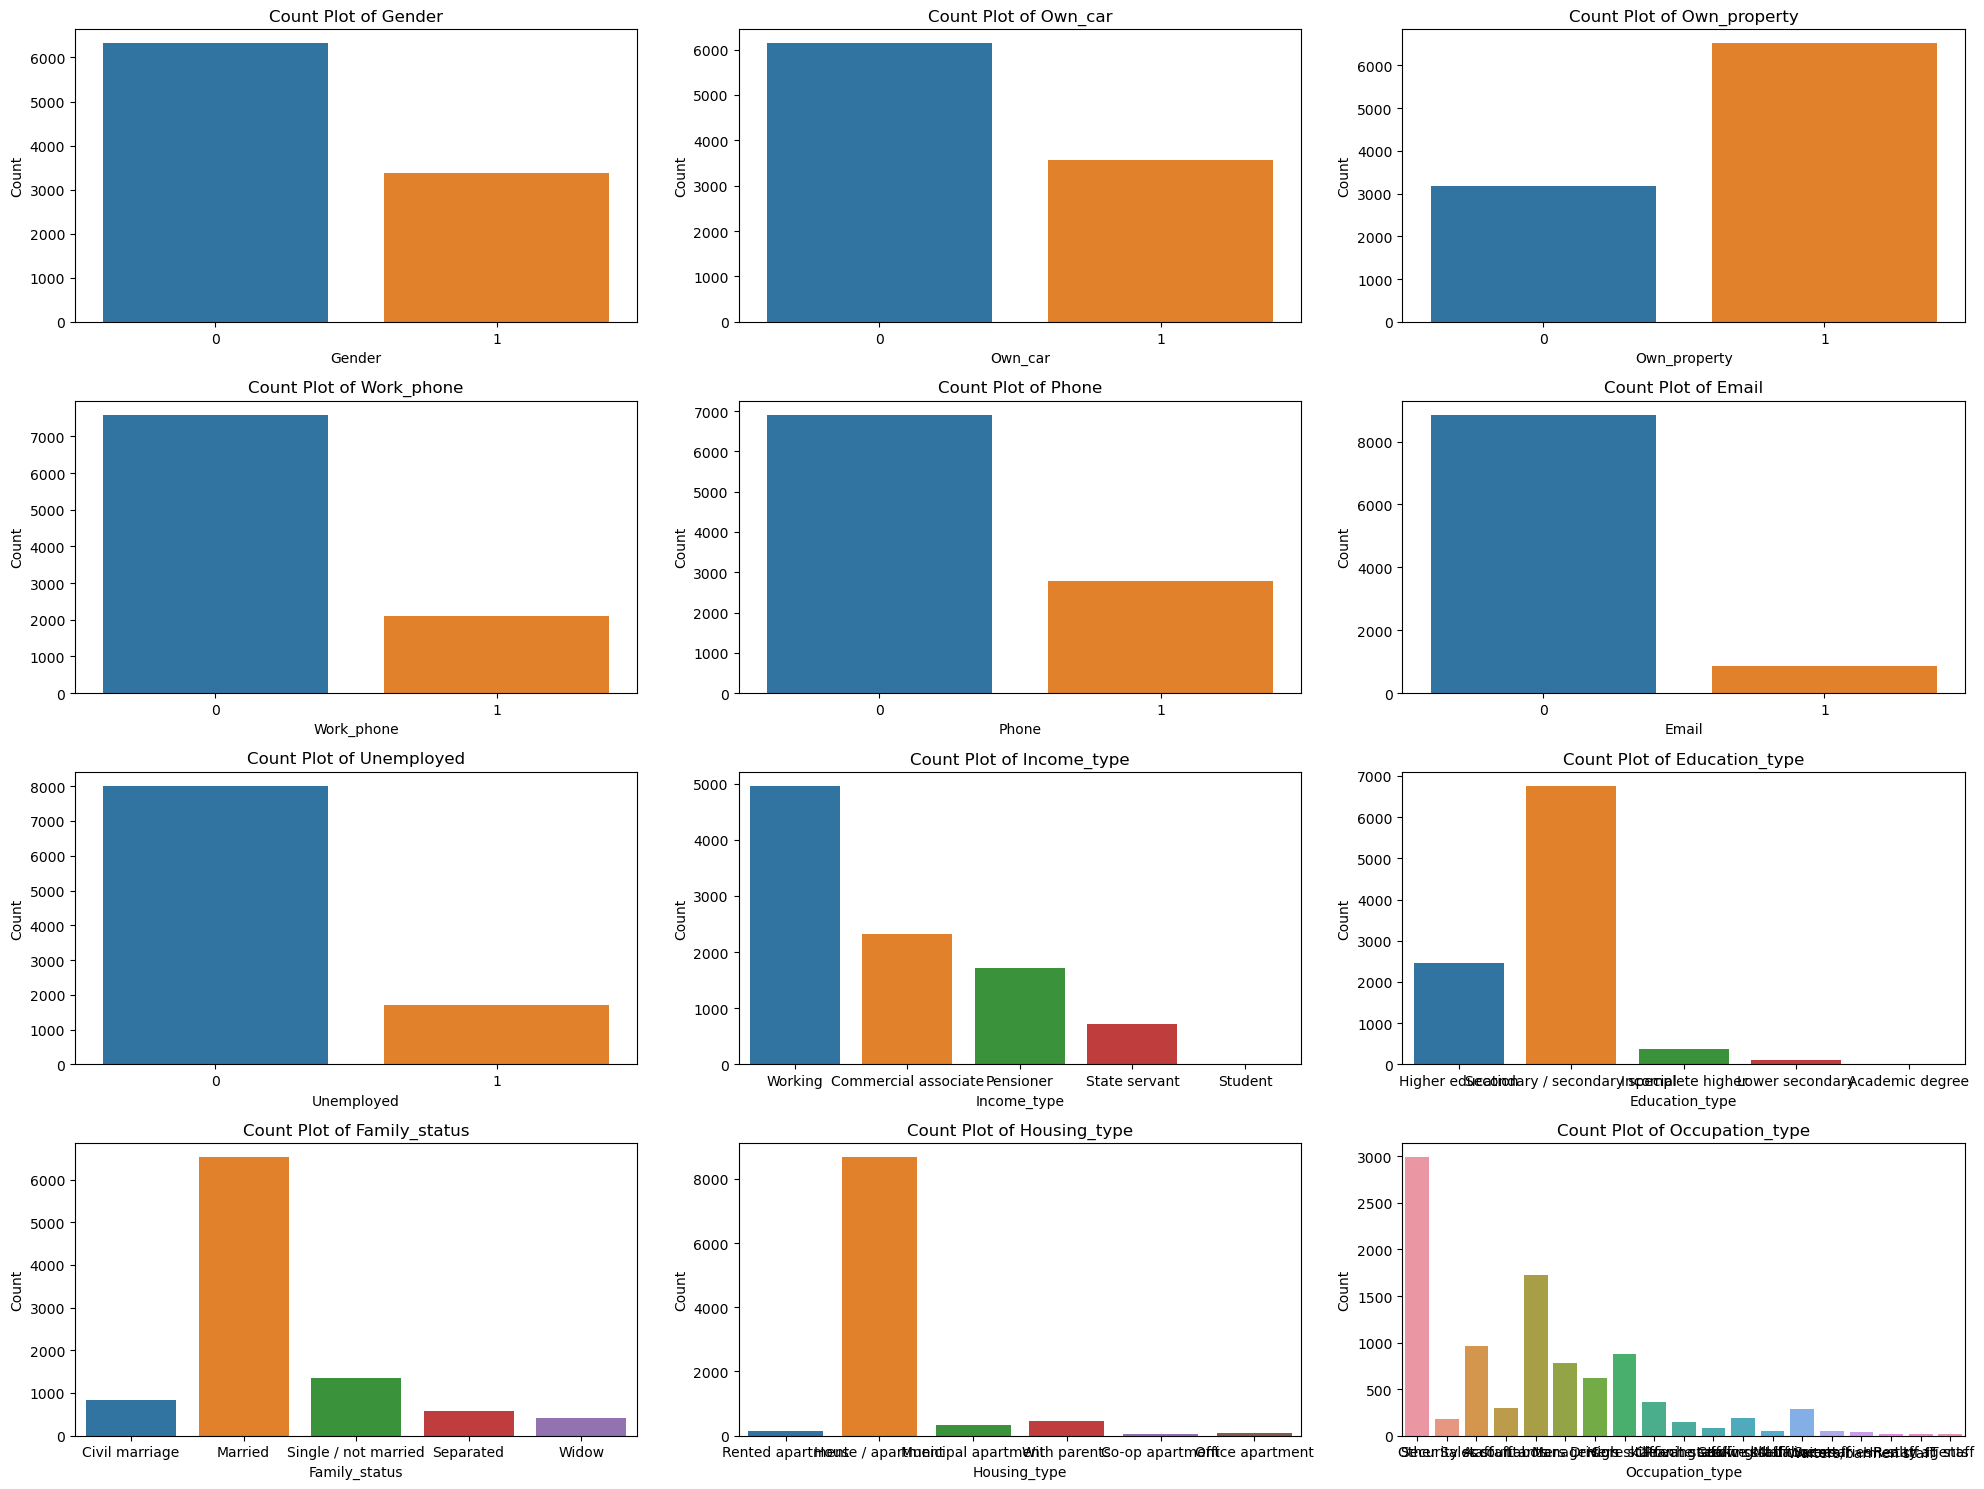

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Bar plots for categorical features
categorical_features = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed', 
                        'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(df[feature])
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

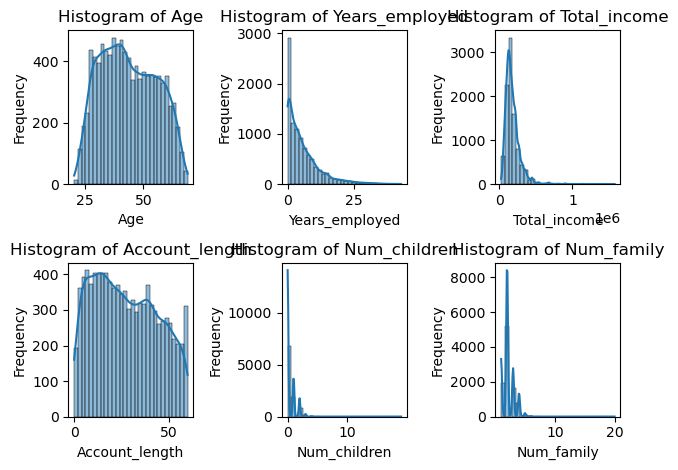

In [10]:
# Histograms for numerical features
numerical_features = ['Age', 'Years_employed', 'Total_income', 'Account_length', 'Num_children', 'Num_family']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

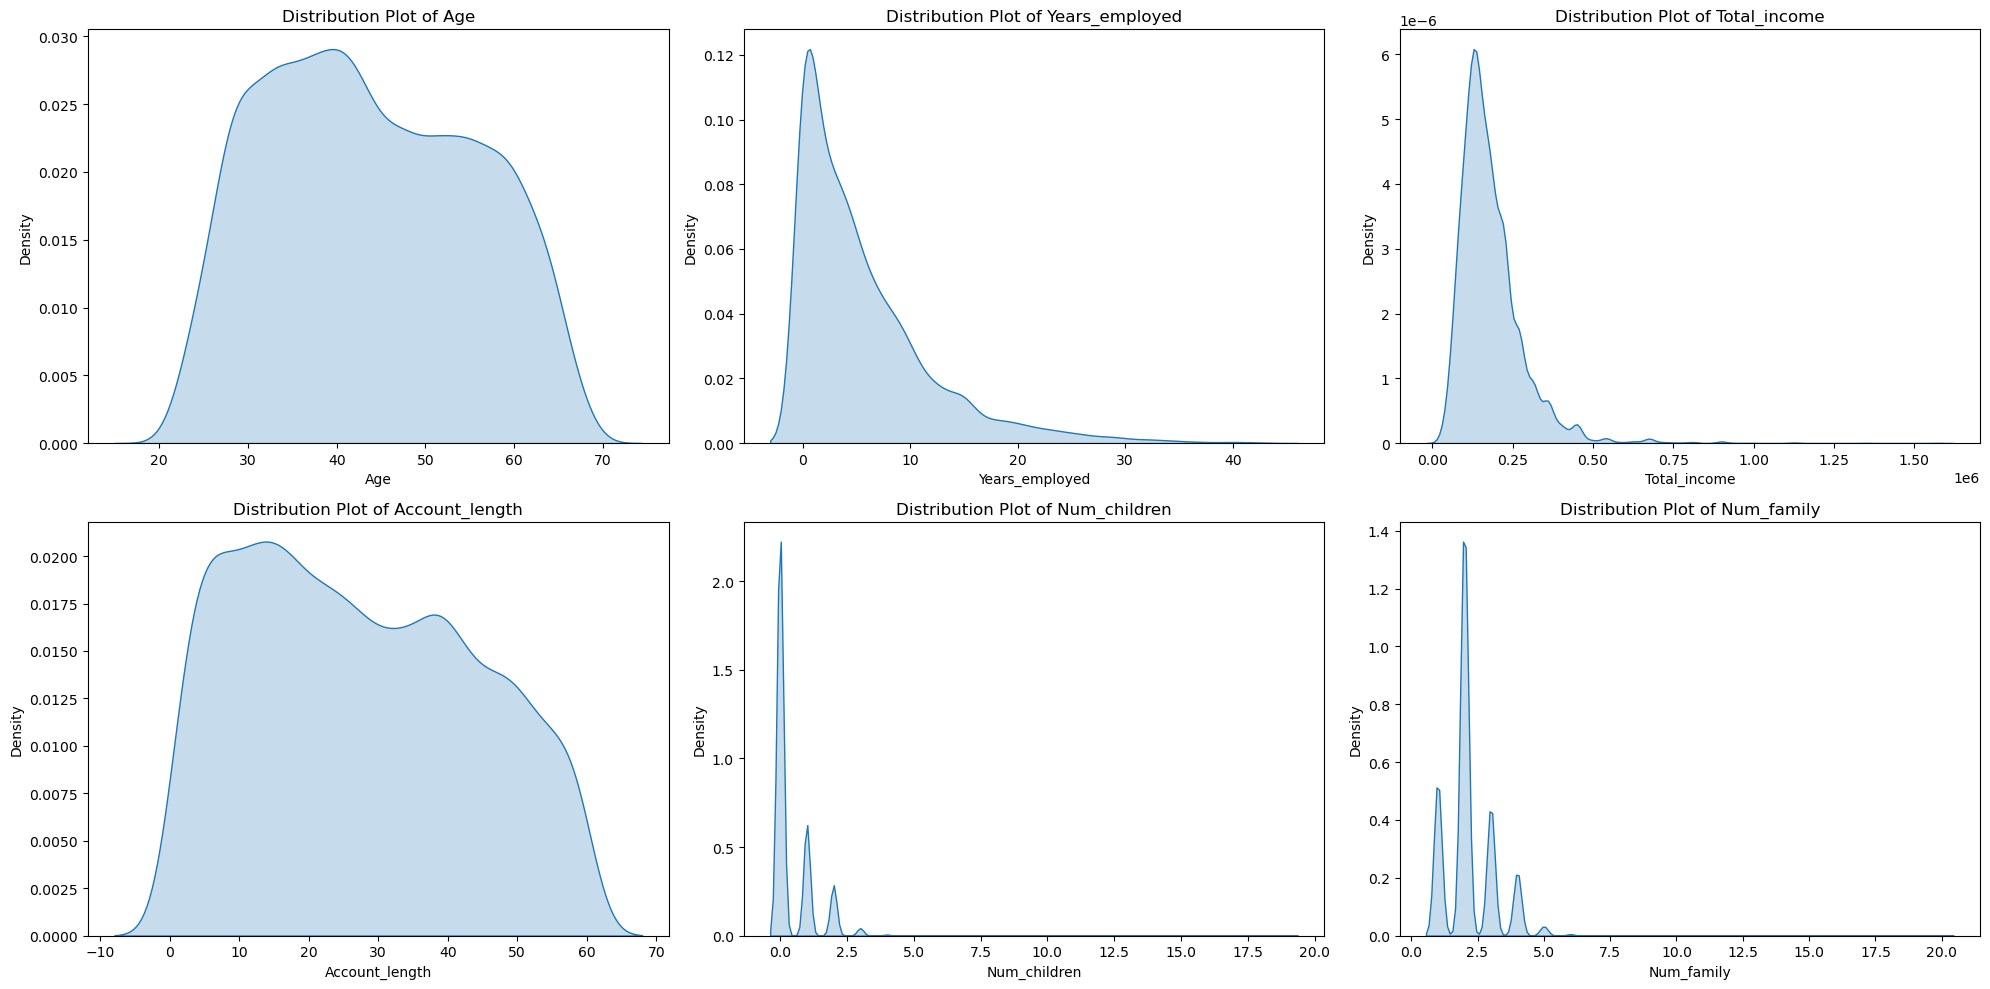

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Distribution plots for numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'Distribution Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [12]:
# Assuming 'Target' is the target variable and the rest are features
target = 'Target'
features = df.drop(columns=[target])

In [13]:
# Handle missing values if any (assuming mean imputation for simplicity)
features = features.fillna(features.mean())

/var/folders/dy/f6d4k32d0g5cdz6m1v2s151c0000gn/T/ipykernel_74062/2474111965.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features = features.fillna(features.mean())


In [14]:
# Encode categorical variables
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])


In [15]:
# Split the data into features and target variable
X = features
y = df[target]

In [16]:
# Standardize/normalize the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7767, 19), (1942, 19), (7767,), (1942,))

In [18]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [19]:
# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

In [20]:
# List of models for iteration
models = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'Naive Bayes': naive_bayes
}

In [32]:
# Cross-validation and performance evaluation
results = {}
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    # Store the results
    results[model_name] = {
        'Cross-Validation Accuracy': cv_scores.mean(),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)
print(classification_report(y_test, y_pred))



/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     Cross-Validation Accuracy  Test Accuracy  Precision  \
Logistic Regression                   0.871250       0.854274   0.729784   
Decision Tree                         0.765807       0.724511   0.759691   
Naive Bayes                           0.861592       0.817199   0.749920   

                       Recall  F1 Score  
Logistic Regression  0.854274  0.787137  
Decision Tree        0.724511  0.740781  
Naive Bayes          0.817199  0.778305  
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1659
           1       0.14      0.05      0.07       283

    accuracy                           0.82      1942
   macro avg       0.50      0.50      0.49      1942
weighted avg       0.75      0.82      0.78      1942



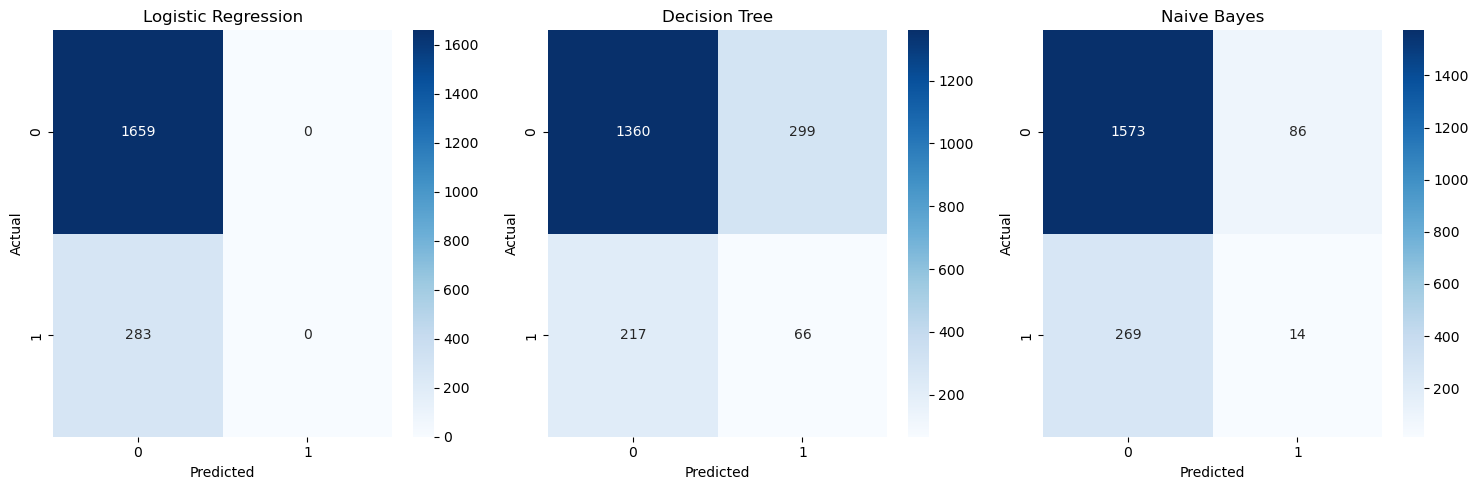

In [22]:
# Fit and predict with logistic regression for demonstration
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

# Fit and predict with decision tree for demonstration
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Fit and predict with naive bayes for demonstration
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

# Confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Naive Bayes')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()
